***The aim of this assignment is to develop a churn prediction model that assists telecom operators in predicting customers who are most likely subject to churn.***

***Customer churning is when a customer decides to stop using a companys product or service. It is the rate at which businesses lose cutomers.***

In [1]:
#Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip uninstall -y tensorflow

Found existing installation: tensorflow 2.14.0
Uninstalling tensorflow-2.14.0:
  Successfully uninstalled tensorflow-2.14.0


In [3]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 66.4 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1


In [4]:
!pip install scikeras

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt          # To create graphs
import seaborn as sns                    # To create graphs

 #To train the deep learning model

import keras
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scikeras.wrappers import KerasClassifier

#Deployment
import joblib
import pickle
from keras.models import save_model

***Question 1: Using the given dataset, extract the relevant features that can define a customer churn.***

In [6]:
#The name of my dataframe is churn_df
churn_df=pd.read_csv('/content/drive/My Drive/Introduction_To_AI_Assignments/CustomerChurn_dataset.csv')
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#Store the feature(s) that is useless in predicting customer churn, that is Customer_ID
useless_features = ['customerID']
useless_features_dataframe = churn_df[useless_features].copy()

#Drop those feature(s)
churn_df = churn_df.drop(['customerID'], axis=1)

In [10]:
churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


*Encoding*

In [11]:
# Encoding
# Store (in a list) and display the features of type Object in churn_df
print("Object Columns")
object_columns = churn_df.select_dtypes(include=['object']).columns
print(object_columns)

Object Columns
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


In [12]:
# Store the features in a dataframe
churn_df_object = churn_df[object_columns]

In [13]:
churn_df_object

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,306.6,Yes


In [14]:
# Drop the TotalCharges feature. It is not categorical. I would rather have to convert it to numeric through another way
# But first, store it first
Total_Charges=churn_df_object['TotalCharges']
churn_df_object1=churn_df_object.drop(columns=['TotalCharges'])

In [15]:
Total_Charges

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [16]:
churn_df_object1

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [17]:
#Dropping the "unencoded" object type features from churn_df
churn_df1 = churn_df.drop(columns=churn_df_object1.columns)
churn_df1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.5
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.5
7039,0,72,103.20,7362.9
7040,0,11,29.60,346.45
7041,1,4,74.40,306.6


In [18]:
# Encoding- Converting non-numeric features into numeric features
label_encoder = LabelEncoder()
encoded_features = churn_df_object1.apply(lambda x: label_encoder.fit_transform(x))

In [19]:
encoded_features

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [20]:
# Concatenating the encoded features with churn_df
churn_df_encoded = pd.concat([churn_df1, encoded_features], axis=1)

In [21]:
churn_df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.5,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.5,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.9,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.6,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [22]:
# Converting the TotalCharges feature into numeric using the to_numeric function
# the pandas.to_numeric() function is unable to interpret or convert string objects into numerical types.
# The function expects numeric-like strings that can be converted to numerical values,
# but if it encounters non-numeric strings that cannot be interpreted as numbers, it raises a ValueError.
# Hence the need for errors = 'coerce'
churn_df_encoded['TotalCharges'] = pd.to_numeric(churn_df_encoded['TotalCharges'], errors='coerce')     # This line converts the column to numeric values, replacing empty strings with NaN.

# Source: https://sparkbyexamples.com/pandas/use-pandas-to_numeric-function/

In [23]:
churn_df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [24]:
churn_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   tenure            7043 non-null   int64  
 2   MonthlyCharges    7043 non-null   float64
 3   TotalCharges      7032 non-null   float64
 4   gender            7043 non-null   int64  
 5   Partner           7043 non-null   int64  
 6   Dependents        7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   int64  
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   int64  


*Imputing (the TotalCharges feature)*

In [25]:
churn_df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [26]:
# Imputting the data- replacing NAN in the TotalCharges column
Total_Charges = churn_df_encoded[['TotalCharges']]
Total_Charges_reshaped = Total_Charges.values.reshape(-1, 1)        # Changing the 1D array into a 2D array due to the ValueError I got
imputer=SimpleImputer (strategy= 'mean')
churn_df_encoded['TotalCharges'] = imputer.fit_transform(Total_Charges_reshaped)

In [27]:
churn_df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


*Correlation Analysis*

In [28]:
#Storing the target feature, Churn
Churn_Target=churn_df_encoded['Churn']

In [29]:
#Drop the target feature
churn_df_encoded=churn_df_encoded.drop(columns=['Churn'])

In [30]:
churn_df_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3
7039,0,72,103.20,7362.90,0,1,1,1,2,1,0,2,2,0,2,2,1,1,1
7040,0,11,29.60,346.45,0,1,1,0,1,0,2,0,0,0,0,0,0,1,2
7041,1,4,74.40,306.60,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3


In [31]:
# Correlation Analysis
#Determine how much each independent feature corelates with the target variable, overall using correlation analysis
correlation = churn_df_encoded.corrwith(Churn_Target).abs()
sorted_correlation = correlation.sort_values(ascending=False)
sorted_correlation

Contract            0.396713
tenure              0.352229
OnlineSecurity      0.289309
TechSupport         0.282492
TotalCharges        0.199428
OnlineBackup        0.195525
MonthlyCharges      0.193356
PaperlessBilling    0.191825
DeviceProtection    0.178134
Dependents          0.164221
SeniorCitizen       0.150889
Partner             0.150448
PaymentMethod       0.107062
InternetService     0.047291
StreamingMovies     0.038492
MultipleLines       0.038037
StreamingTV         0.036581
PhoneService        0.011942
gender              0.008612
dtype: float64

In [32]:
# Store the columns with their correlation coefficient in a dataframe
correlation_df = sorted_correlation.reset_index()
correlation_df.columns = ['Feature', 'Correlation']
correlation_df

,Feature,Correlation
0,Contract,0.396713
1,tenure,0.352229
2,OnlineSecurity,0.289309
3,TechSupport,0.282492
4,TotalCharges,0.199428
5,OnlineBackup,0.195525
6,MonthlyCharges,0.193356
7,PaperlessBilling,0.191825
8,DeviceProtection,0.178134
9,Dependents,0.164221


In [33]:
# Coefficients close to zero means that there is no linear correlation. The decided threshold that indicates no linear correlation is 0.16
# Setting this threshold reduces the risk of including very weak correlations.
# Also, it allows the inclusion of features with moderate correlations that might be useful in building the deep learning model.
# Therefore, any coefficient less than 0.16 is considered to have no linear correlation with the target variable.

correlation_threshold = 0.16
columns_with_no_linear_correlation = correlation_df[correlation_df['Correlation'] <= correlation_threshold]


#Display the features with no linear correlation in a list
features_with_no_linear_correlation = columns_with_no_linear_correlation['Feature'].tolist()
features_with_no_linear_correlation

['SeniorCitizen',
 'Partner',
 'PaymentMethod',
 'InternetService',
 'StreamingMovies',
 'MultipleLines',
 'StreamingTV',
 'PhoneService',
 'gender']

In [34]:
#Drop the columns with no linear correlation
churn_df_has_correlation = churn_df_encoded.drop(['SeniorCitizen',
 'Partner','OnlineBackup', 'InternetService', 'MultipleLines', 'PhoneService', 'gender'], axis=1)

In [35]:
churn_df_has_correlation

,tenure,MonthlyCharges,TotalCharges,Dependents,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1,29.85,29.85,0,0,0,0,0,0,0,1,2
1,34,56.95,1889.50,0,2,2,0,0,0,1,0,3
2,2,53.85,108.15,0,2,0,0,0,0,0,1,3
3,45,42.30,1840.75,0,2,2,2,0,0,1,0,0
4,2,70.70,151.65,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,2,2,2,2,2,1,1,3
7039,72,103.20,7362.90,1,0,2,0,2,2,1,1,1
7040,11,29.60,346.45,1,2,0,0,0,0,0,1,2
7041,4,74.40,306.60,0,0,0,0,0,0,0,1,3


*Scaling*

In [36]:
# Scaling the data
churn_df_scaled=pd.DataFrame(StandardScaler().fit_transform(churn_df_has_correlation))


In [38]:
churn_df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.277445,-1.160323,-0.994971,-0.654012,-0.918838,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558
1,0.066327,-0.259629,-0.173876,-0.654012,1.407321,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863
2,-1.236724,-0.362660,-0.960399,-0.654012,1.407321,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863
3,0.514251,-0.746535,-0.195400,-0.654012,1.407321,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052
4,-1.236724,0.197365,-0.941193,-0.654012,-0.918838,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,-0.340876,0.665992,-0.129281,1.529024,1.407321,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863
7039,1.613701,1.277533,2.242808,1.529024,-0.918838,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747
7040,-0.870241,-1.168632,-0.855182,1.529024,1.407321,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558
7041,-1.155283,0.320338,-0.872777,-0.654012,-0.918838,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863


***Question 2: Use your EDA(Exploratory Data Analysis) skills to find out which customer profiles relate to churning a lot***

In [39]:
# Create a copy of the DataFrame
copied_churn_df= churn_df.copy()

In [40]:
copied_churn_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [41]:
# Store the features with no linear correlation (done in Question 1)

# Create an empty dictionary to store features
features_dict = {}

# Store features in the dictionary
features_dict['Senior_Citizen'] = copied_churn_df['SeniorCitizen']
features_dict['partner'] = copied_churn_df['Partner']
features_dict['Online_Backup'] = copied_churn_df['OnlineBackup']
features_dict['Internet_Service'] = copied_churn_df['InternetService']
features_dict['Multiple_Lines'] = copied_churn_df['MultipleLines']
features_dict['Phone_Service'] = copied_churn_df['PhoneService']
features_dict['Gender'] = copied_churn_df['gender']

In [42]:
features_dict

{'Senior_Citizen': 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 7038    0
 7039    0
 7040    0
 7041    1
 7042    0
 Name: SeniorCitizen, Length: 7043, dtype: int64,
 'partner': 0       Yes
 1        No
 2        No
 3        No
 4        No
        ... 
 7038    Yes
 7039    Yes
 7040    Yes
 7041    Yes
 7042     No
 Name: Partner, Length: 7043, dtype: object,
 'Online_Backup': 0       Yes
 1        No
 2       Yes
 3        No
 4        No
        ... 
 7038     No
 7039    Yes
 7040     No
 7041     No
 7042     No
 Name: OnlineBackup, Length: 7043, dtype: object,
 'Internet_Service': 0               DSL
 1               DSL
 2               DSL
 3               DSL
 4       Fiber optic
            ...     
 7038            DSL
 7039    Fiber optic
 7040            DSL
 7041    Fiber optic
 7042    Fiber optic
 Name: InternetService, Length: 7043, dtype: object,
 'Multiple_Lines': 0       No phone service
 1                     No
 2                     No
 3

In [43]:
#Drop the columns with no linear correlation
copied_churn_df = copied_churn_df.drop(['SeniorCitizen',
 'Partner','OnlineBackup', 'InternetService', 'MultipleLines', 'PhoneService', 'gender'], axis=1)

In [44]:
copied_churn_df

,Dependents,tenure,OnlineSecurity,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,No,1,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,34,Yes,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,No,2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,45,Yes,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,2,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,24,Yes,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Yes,72,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Yes,11,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,No,4,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


*Dependents vs Churn*

In [45]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['Dependents'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


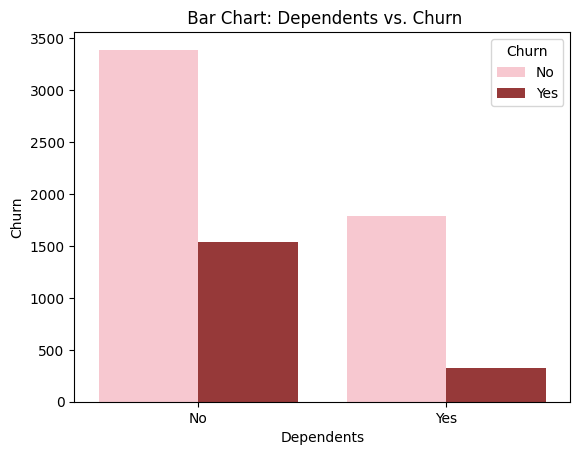

In [46]:
# Plot the  bar chart
sns.countplot(x='Dependents', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Dependents')
plt.ylabel('Churn')
plt.title(' Bar Chart: Dependents vs. Churn')
plt.show()

Evaluation: Customers who don't have dependents are more likely to churn or stop using the company's product or service

*Online Security vs Churn*

In [47]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['OnlineSecurity'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


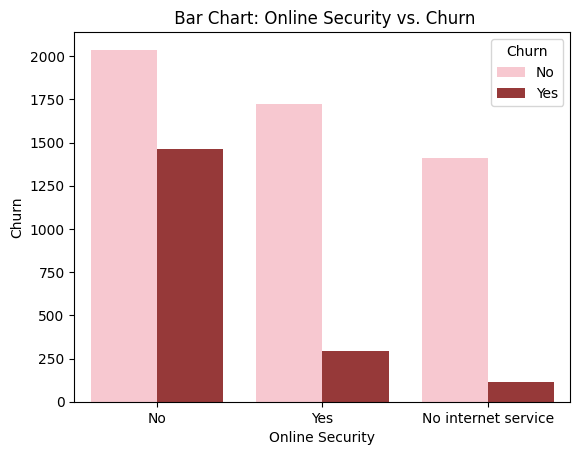

In [48]:
# Plot the  bar chart
sns.countplot(x='OnlineSecurity', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Online Security')
plt.ylabel('Churn')
plt.title(' Bar Chart: Online Security vs. Churn')
plt.show()

Evaluation: Customers with no online security are more likely to churn or stop using the company's product or service

*Device Protection vs Churn*

In [49]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['DeviceProtection'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


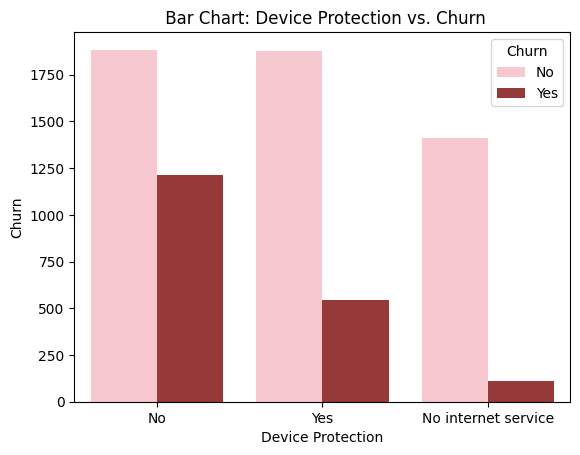

In [50]:
# Plot the  bar chart
sns.countplot(x='DeviceProtection', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Device Protection')
plt.ylabel('Churn')
plt.title(' Bar Chart: Device Protection vs. Churn')
plt.show()

Evaluation: Customers with no device protection are more likely to churn or stop using the company's product or service

*Tech Support vs Churn*

In [51]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['TechSupport'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


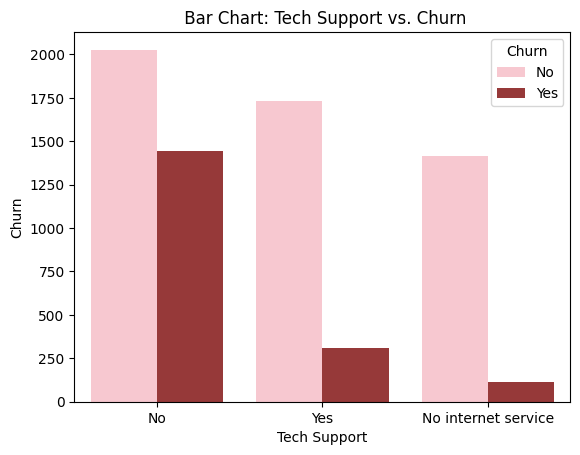

In [52]:
# Plot the  bar chart
sns.countplot(x='TechSupport', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Tech Support')
plt.ylabel('Churn')
plt.title(' Bar Chart: Tech Support vs. Churn')
plt.show()

Evaluation: Customers with no tech support are more likely to churn or stop using the company's product or service

*Streaming TV vs Churn*

In [53]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['StreamingTV'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


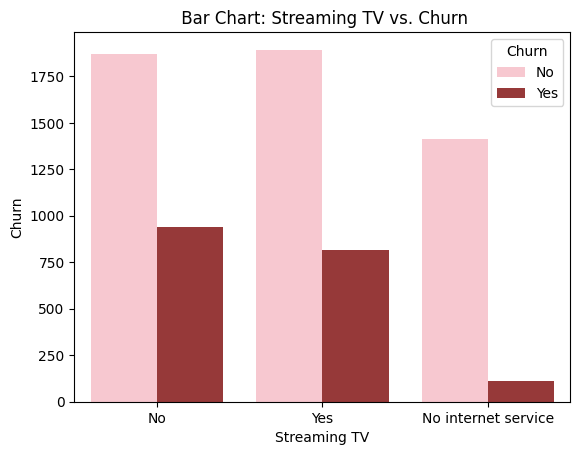

In [54]:
# Plot the  bar chart
sns.countplot(x='StreamingTV', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Streaming TV')
plt.ylabel('Churn')
plt.title(' Bar Chart: Streaming TV vs. Churn')
plt.show()

Evaluation: Customers with no streaming TV are more likely to churn or stop using the company's product or service

*Streaming Movies vs Churn*

In [55]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['StreamingMovies'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


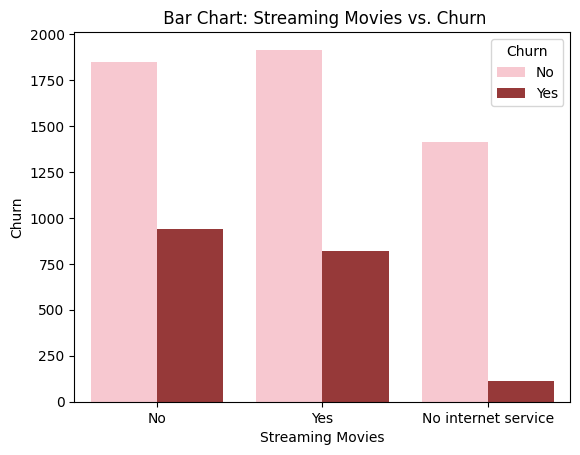

In [56]:
# Plot the  bar chart
sns.countplot(x='StreamingMovies', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Streaming Movies')
plt.ylabel('Churn')
plt.title(' Bar Chart: Streaming Movies vs. Churn')
plt.show()

Evaluation: Customers with no streaming movies are more likely to churn or stop using the company's product or service

*Contract vs Churn*

In [57]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['Contract'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


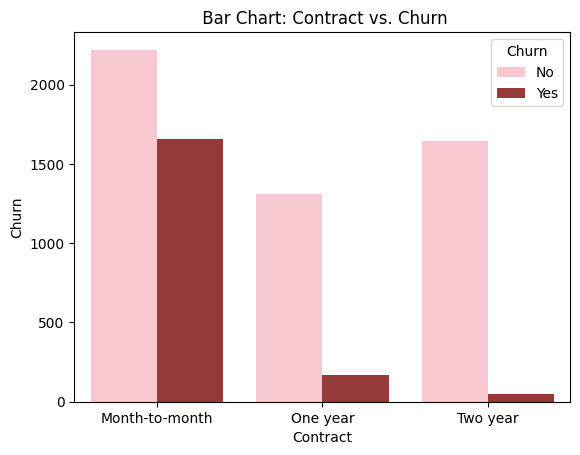

In [58]:
# Plot the  bar chart
sns.countplot(x='Contract', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Contract')
plt.ylabel('Churn')
plt.title(' Bar Chart: Contract vs. Churn')
plt.show()

Evaluation: Customers with a month-to-month contract are more likely to churn or stop using the company's product or service

*Paperless Billing vs Churn*

In [59]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['PaperlessBilling'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


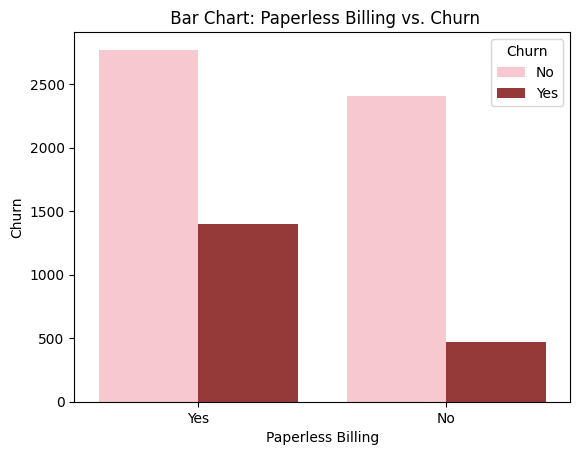

In [60]:
# Plot the  bar chart
sns.countplot(x='PaperlessBilling', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Paperless Billing')
plt.ylabel('Churn')
plt.title(' Bar Chart: Paperless Billing vs. Churn')
plt.show()

Evaluation: Customers with paperless billing are more likely to churn or stop using the company's product or service

*Payment Method vs Churn*

In [61]:
# Create a contingency table
contingency_table = pd.crosstab(copied_churn_df['PaymentMethod'], copied_churn_df['Churn'])
contingency_table

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


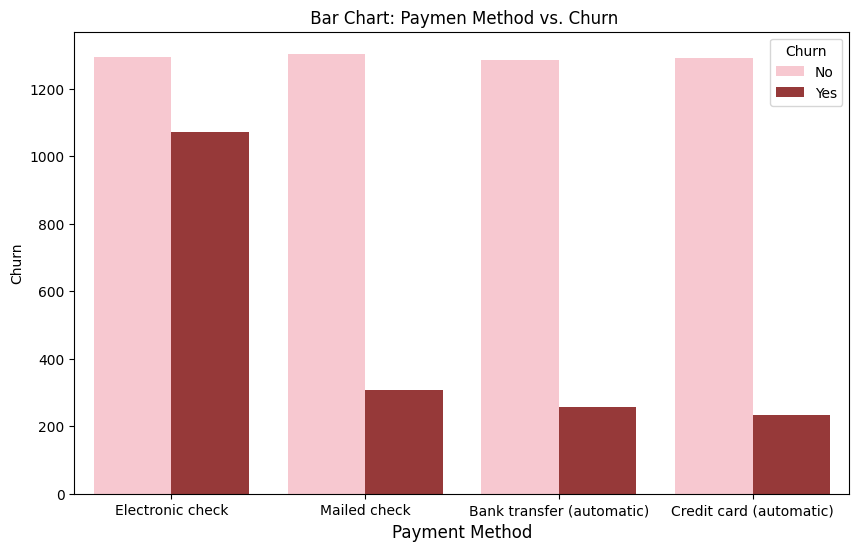

In [62]:
# Plot the  bar chart
plt.figure(figsize=(10, 6))  # Adjust the size of the chart

sns.countplot(x='PaymentMethod', hue='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Churn')
plt.title(' Bar Chart: Paymen Method vs. Churn')
plt.show()

Evaluation: Customers with a payment method of electronic check are more likely to churn or stop using the company's product or service

*Tenure vs Churn*

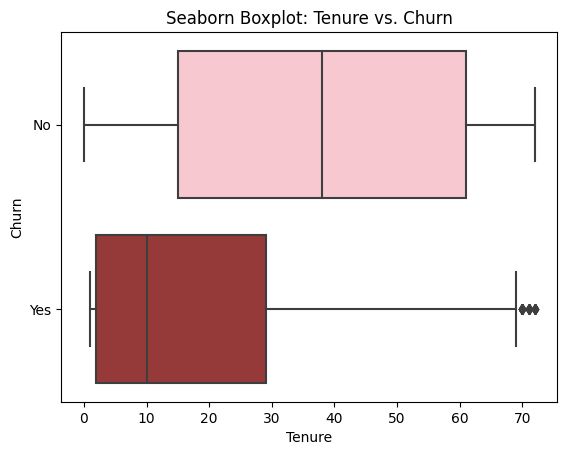

In [63]:
# Plot the boxplot
sns.boxplot(x='tenure', y='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.title('Seaborn Boxplot: Tenure vs. Churn')
plt.show()

Evaluation: Customers with smaller tenures are more likely to churn or stop using the company's product or service

*Monthly Charges vs Churn*

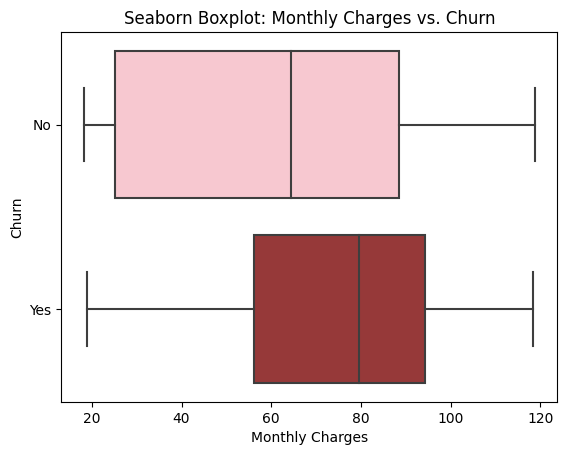

In [64]:
# Plot the boxplot
sns.boxplot(x='MonthlyCharges', y='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Monthly Charges')
plt.ylabel('Churn')
plt.title('Seaborn Boxplot: Monthly Charges vs. Churn')
plt.show()

Evaluation: Customers with greater monthly charges are more likely to churn or stop using the company's product or service

*Total Charges vs Churn*

In [65]:
copied_churn_df['TotalCharges'] = pd.to_numeric(copied_churn_df['TotalCharges'], errors='coerce')     # This line converts the column to numeric values, replacing empty strings with NaN.

In [66]:
# Imputting the data- replacing NAN in the TotalCharges column
Total_Charges = copied_churn_df[['TotalCharges']]
Total_Charges_reshaped = Total_Charges.values.reshape(-1, 1)        # Changing the 1D array into a 2D array due to the ValueError I got
imputer=SimpleImputer (strategy= 'mean')
copied_churn_df['TotalCharges'] = imputer.fit_transform(Total_Charges_reshaped)

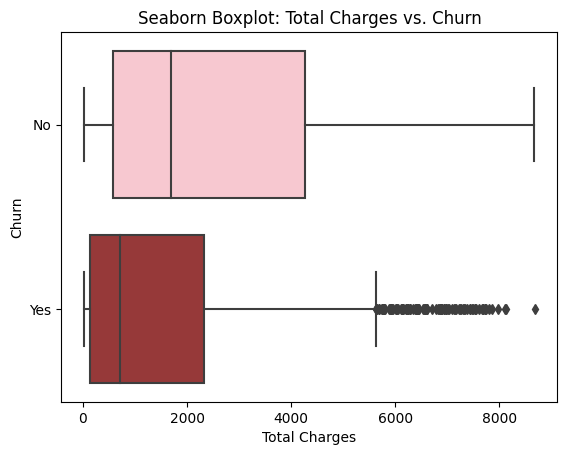

In [67]:
# Plot the boxplot
sns.boxplot(x='TotalCharges', y='Churn', data=copied_churn_df, palette=['pink', 'brown'])
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.title('Seaborn Boxplot: Total Charges vs. Churn')
plt.show()

Evaluation: Customers with smaller total charges are more likely to churn or stop using the company's product or service

***Question 3: Using the features in (1) define and train a Multi-Layer Perceptron model using the Functional API***

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(churn_df_scaled, Churn_Target, test_size=0.2, random_state=42)

In [69]:
# Keras Functional API model
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

In [70]:
# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

In [71]:
# Print the model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 24)                792       
                                                                 
 dense_2 (Dense)             (None, 12)                300       
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 1521 (5.94 KB)
Trainable params: 1521 (5.94 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/1000
177/177 [==============================] - 2s 6ms/step - loss: 0.6775 - accuracy: 0.6084 - val_loss: 0.6335 - val_accuracy: 0.7516
Epoch 2/1000
177/177 [==============================] - 1s 4ms/step - loss: 0.6017 - accuracy: 0.7659 - val_loss: 0.5593 - val_accuracy: 0.7793
Epoch 3/1000
177/177 [==============================] - 1s 4ms/step - loss: 0.5363 - accuracy: 0.7717 - val_loss: 0.5003 - val_accuracy: 0.7864
Epoch 4/1000
177/177 [==============================] - 1s 5ms/step - loss: 0.4925 - accuracy: 0.7772 - val_loss: 0.4674 - val_accuracy: 0.7828
Epoch 5/1000
177/177 [==============================] - 1s 4ms/step - loss: 0.4694 - accuracy: 0.7806 - val_loss: 0.4496 - val_accuracy: 0.7928
Epoch 6/1000
177/177 [==============================] - 1s 4ms/step - loss: 0.4573 - accuracy: 0.7829 - val_loss: 0.4400 - val_accuracy: 0.7935
Epoch 7/1000
177/177 [==============================] - 1s 4ms/step - loss: 0.4506 - accuracy: 0.7831 - val_loss: 0.4345 - val_accuracy:

In [74]:
!pip install --upgrade tensorflow

In [75]:
# Use the trained model to make predictions on the test set and evaluates its performance.
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

45/45 [==============================] - 0s 1ms/step


In [76]:
print('Test accuracy:', accuracy)
print('AUC score:', auc_score)

Test accuracy: 0.7856635911994322
AUC score: 0.8247461364083348


*Training with Cross Validation and Grid Search*

In [77]:
# Define a function to create the model (as you did before)
def create_model(optimizer='adam', hidden_units=(200, 150)):
    num_features = X_train.shape[1]
    inputs = Input(shape=(num_features,))
    x = Dense(hidden_units[0], activation='relu')(inputs)
    x = Dense(hidden_units[1], activation='relu')(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inputs, outputs=outputs)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model

In [78]:
# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, optimizer='adam', hidden_units=(200, 150), verbose=0)

In [79]:
# Define the parameter grid for grid search
param_grid = {
    'hidden_units': [(64, 32), (128, 64), (128, 128)],
    'optimizer': ['adam', 'sgd'],
}

In [80]:
# Create StratifiedKFold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [81]:
# Create GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid= param_grid, cv=skf, scoring='accuracy', n_jobs=-1)

In [82]:
!pip install --upgrade tensorflow

In [83]:
# Fit the model to the training data
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [84]:
# Print the best parameters and corresponding accuracy
print("Best Parameters: ", grid_result.best_params_)
print("Best Accuracy: ", grid_result.best_score_)

Best Parameters:  {'hidden_units': (128, 64), 'optimizer': 'sgd'}
Best Accuracy:  0.7896696774315565


In [85]:
!pip install --upgrade tensorflow

***Question 4: Evaluate the model’s accuracy and calculate the AUC score***

In [86]:
# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
test_accuracy = accuracy_score(y_test, y_pred_binary)
auc_score = roc_auc_score(y_test, y_pred)

In [87]:
print("Test Accuracy: ", test_accuracy)
print("AUC Score: ", auc_score)

Test Accuracy:  0.8105039034776437
AUC Score:  0.7373132899272311


***Question 5: Create a platform to host the model either web-based or desktop application***

In [88]:
import pickle
# save
with open('/content/drive/My Drive/Introduction_To_AI_Assignments/best_model.pkl','wb') as f:
    pickle.dump(best_model.model, f)